In [1]:
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def resize_image(path):
    lst_names = os.listdir(path)
    for name in lst_names:
        new_path = path + '/' + name
        im = Image.open(new_path)
        im = im.resize((32,32))
        im = im.save(new_path)

In [3]:
def load_data():
    path_train = r'C:/Users/longt/Downloads/train'
    path_test = r'C:/Users/longt/Downloads/test'
    
    
    n = int(12500 * 0.05)
    x_train = []
    y_train = []
    x_val = []
    y_val = []
    x_test = []
    y_test = []
    
    lst_names_train = os.listdir(path_train)
    for name in lst_names_train:
        x_train.append(np.asarray(Image.open(path_train + '/' + name)))
        y_train.append(0 if name.split('.')[0] == 'cat' else 1)
        
    x_val = x_train[12500-n:12500] + x_train[-n:]
    x_train = x_train[:12500-n] + x_train[12500:-n]
    y_val = y_train[12500-n:12500] + y_train[-n:]
    y_train = y_train[:12500-n] + y_train[12500:-n]
        
    lst_names_test = os.listdir(path_test)
    for name in lst_names_test:
        x_test.append(np.asarray(Image.open(path_test + '/' + name)))
        y_test.append(int(name.split('.')[0]))
        
    return (x_train, y_train), (x_val, y_val), (x_test, y_test)

In [4]:
def pre_tranning(x_train, y_train, x_val, y_val, x_test, y_test):
    
    x_train, x_test, x_val = np.asarray(x_train) / 255, np.asarray(x_test) / 255 , np.asarray(x_val) / 255 
    y_train, y_test, y_val = np.asarray(y_train) , np.asarray(y_test) , np.asarray(y_val) 
    
    per_train = np.random.permutation(len(x_train))
    per_val = np.random.permutation(len(x_val))
    
    x_train = x_train[per_train]
    y_train = y_train[per_train]
    x_val = x_val[per_val]
    y_val = y_val[per_val]
    
    return (x_train, y_train), (x_val, y_val), (x_test, y_test)

In [ ]:
resize_image(r'C:/Users/longt/Downloads/train')
resize_image(r'C:/Users/longt/Downloads/test')

In [5]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_data()

In [6]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = pre_tranning(x_train, y_train, x_val, y_val, x_test, y_test)

In [7]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3,3), padding='Same', activation='relu', input_shape=(32,32,3)),
    #BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), padding='Same', activation='relu'),
    #BatchNormalization(),
    MaxPooling2D((2,2)),
    #Dropout(0.2),
    
    Conv2D(128, (3,3), padding='Same', activation='relu'),
    #BatchNormalization(),
    MaxPooling2D((2,2)),
    #Dropout(0.2),
    
    Flatten(),
    Dense(64, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2, activation = 'softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

Epoch 1/30
743/743 [==============================] - 31s 41ms/step - loss: 0.6251 - accuracy: 0.6408 - val_loss: 0.5314 - val_accuracy: 0.7432
Epoch 2/30
743/743 [==============================] - 31s 42ms/step - loss: 0.5128 - accuracy: 0.7498 - val_loss: 0.4621 - val_accuracy: 0.7792
Epoch 3/30
743/743 [==============================] - 32s 43ms/step - loss: 0.4518 - accuracy: 0.7875 - val_loss: 0.4315 - val_accuracy: 0.7888
Epoch 4/30
743/743 [==============================] - 32s 43ms/step - loss: 0.4084 - accuracy: 0.8135 - val_loss: 0.4299 - val_accuracy: 0.8064
Epoch 5/30
743/743 [==============================] - 32s 43ms/step - loss: 0.3685 - accuracy: 0.8336 - val_loss: 0.3944 - val_accuracy: 0.8232
Epoch 6/30
743/743 [==============================] - 32s 43ms/step - loss: 0.3241 - accuracy: 0.8557 - val_loss: 0.4107 - val_accuracy: 0.8160
Epoch 7/30
743/743 [==============================] - 31s 42ms/step - loss: 0.2848 - accuracy: 0.8777 - val_loss: 0.4377 - val_accuracy:

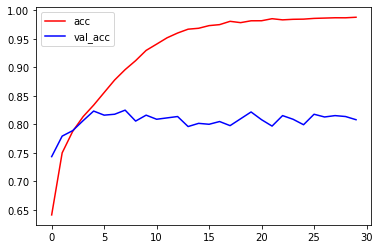

In [9]:
res = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
plt.plot(res.history['accuracy'], label='acc', color='red')
plt.plot(res.history['val_accuracy'], label='val_acc', color='blue')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

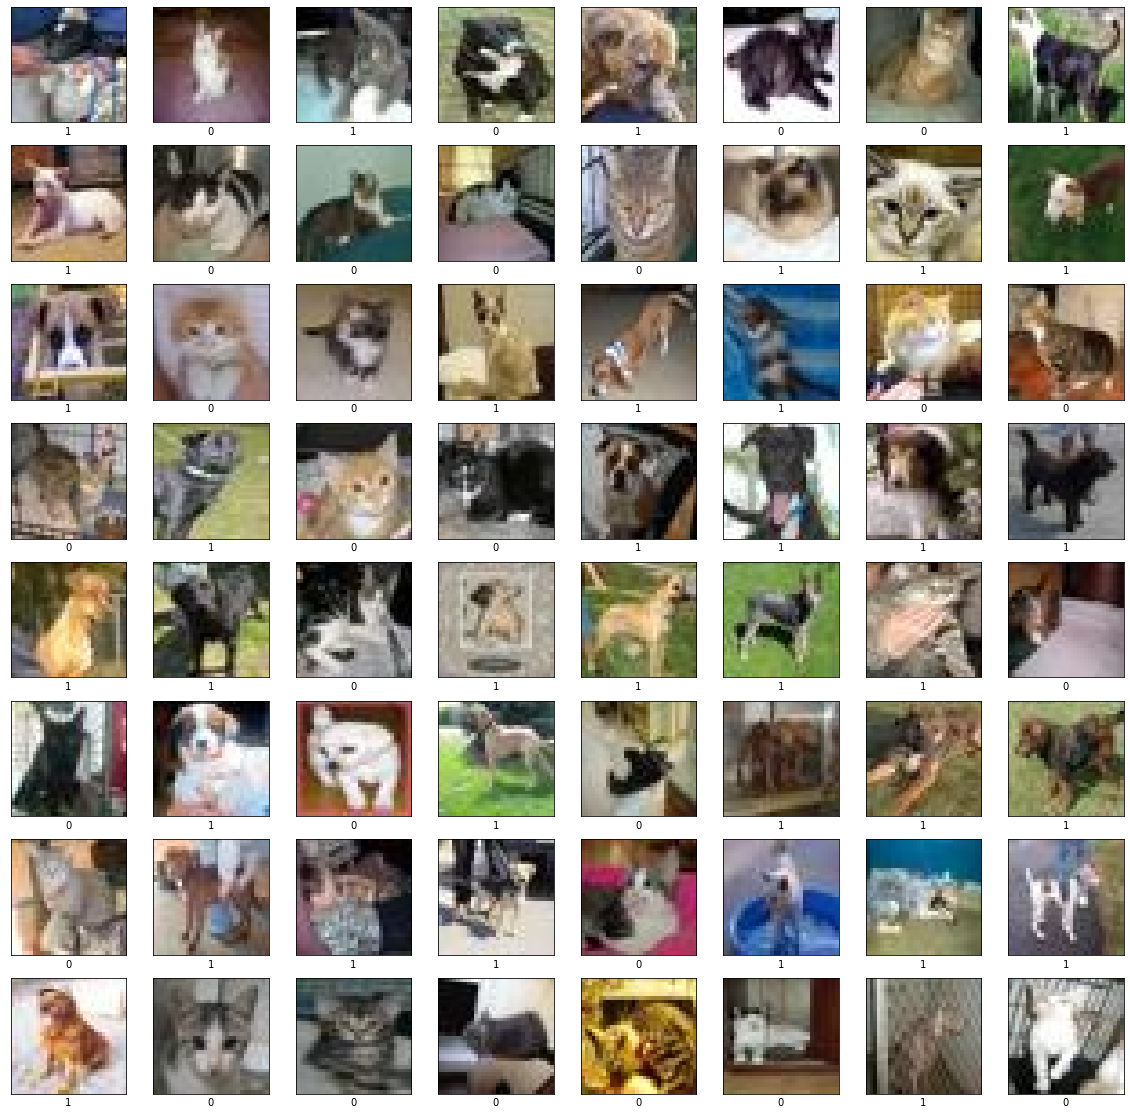

In [20]:
plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    n = np.array(x_test[i])
    p = n.reshape(1, 32, 32, 3)
    predicted_label = model.predict(p).argmax()
    plt.xlabel(predicted_label)
plt.show